# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [5]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np

Pretty printing has been turned ON


## Reminder 1 

Plot $x(t) = sin(2\pi f t)$,  $f = 1 Hz$

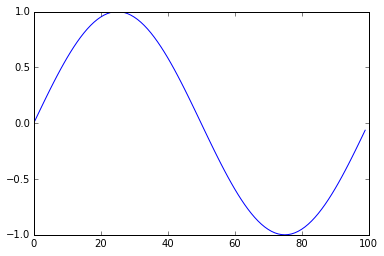

In [79]:
n = np.arange(0.000, 1, 0.01)
f0 = 1
phi = 0
A = 1
x = A * np.sin(2 * np.pi * f0 * t)
plt.plot(x)

Plot $x[n] = sin(2\pi f n)$ with frequency step of $f_s$
$$x[n] = sin(2\pi\frac{f}{f_s}n)$$

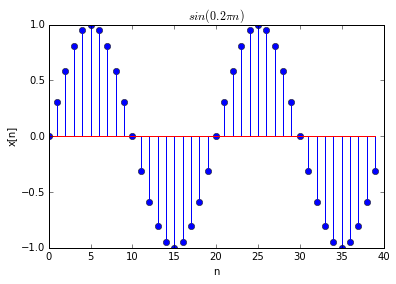

In [50]:
n=np.arange(0,40,1)
s=np.sin(0.1*np.pi*n)   #2pi*1/20t
plt.figure
plt.stem(s)
plt.title('$sin(0.2 \pi n)$')
plt.xlabel('n')
plt.ylabel('x[n]')

## Exercise 1 - Causality

 **1.1** Considering the system defined by the equation $y_k=(x_k+x_{k+1})/2$, check its causality property by examining the response to the signal $H(k-4)$ or `step(4,N)`.

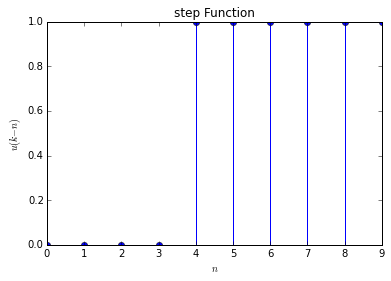

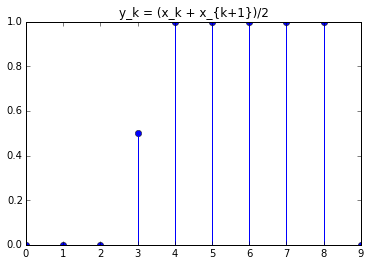

In [104]:
#this is our step function defined in lab1
def step(n=4, N=10):
    if n>N-1:
        raise ValueError('n should be inferior to N-1')
        #create the array
    s=np.zeros((N,))
        #place the Dirac
    s[n:N]=1
    return s

#we plot it just for checking
plt.figure
plt.stem(step(4))
plt.xlabel(r'$n$')
plt.ylabel(r'$u(k-n)$')
plt.title('step Function')
plt.show()
N=10

#now we use it;;;;pay attention to the way we define the array and how it is filled, as it is done separately
s = step(4)
y=np.zeros((N,))
for i in range (0,N-1):
    y[i]=(s[i]+s[i+1])/2

#we have a peak at 3 (before the input!!)  that means it is not causal
#the first value is tha half because it is the average of two (divided by 2)
plt.figure
plt.stem(y)
plt.title('y_k = (x_k + x_{k+1})/2')
plt.show()

**1.2** Propose a modification to obtain a causal version

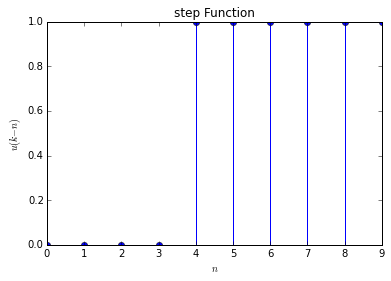

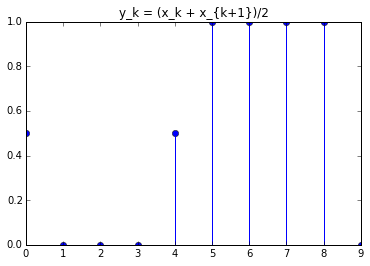

In [106]:
plt.figure
plt.stem(step(4))
plt.xlabel(r'$n$')
plt.ylabel(r'$u(k-n)$')
plt.title('step Function')
plt.show()
N=10

#now we use it;;;;pay attention to the way we define the array and how it is filled, as it is done separately
s = step(4)
y=np.zeros((N,))
for i in range (0,N-1):
    y[i]=(s[i-1]+s[i])/2

#we have a peak at 3 (before the input!!)  that means it is not causal
#the first value is tha half because it is the average of two (divided by 2)
plt.figure
plt.stem(y)
plt.title('y_k = (x_k + x_{k+1})/2')
plt.show()

Comments on your observations

## Exercise 2 - stability

**2.1** Program the primitive (accumulator) operator `prim(f)` applied on the signal  `f` of length `N`. The value of the vector returned by `prim` at the index `k` will correspond to $F_k$ with `k` $\leq$ `N`. Note $F_k=\sum_{q=-\infty}^{k}f_k$. Discuss on the result of the primitive operator applied to the signal $H(k-4)$. Is the primitive operator stable ?



In [115]:
def prim(f):
    Fk = np.zeros((N,))
    for i in range (1,N):
        f[i]=(f[i-1]+f[i])
    Fk = f
    return Fk
    


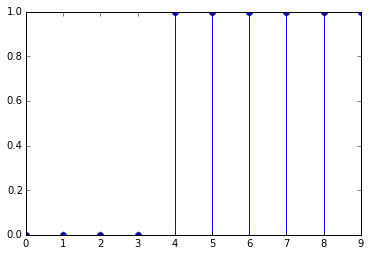

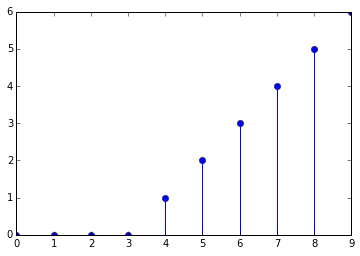

In [117]:
y=np.zeros((N,))
k=4
N=10
s[k:N]=1   #you can just make a step this way, it-s easier!!
plt.figure
plt.stem(s)
plt.show()

Fk=prim(s)
plt.figure
plt.stem(Fk)
plt.show()

#DISCUSS: so as we see, if we input a step the response is unstable
#This is because the integral of the step is the ramp, and it is continously increasing
#It is also causal

**2.2** What is the impulse response of the primitive operator (in the discrete domain) ?

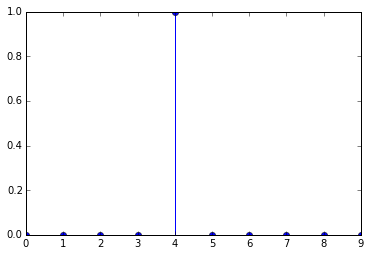

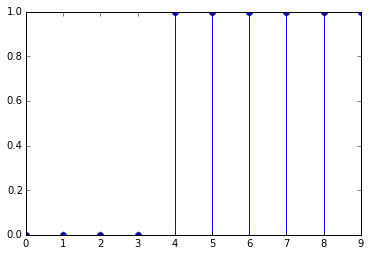

In [123]:
delta=np.zeros((N,))
k=4
N=10
delta[4]=1
plt.figure
plt.stem(delta)
plt.show()

Fk=prim(delta)
plt.figure
plt.stem(Fk)
plt.show()

#DISCUSS: Now, if we input a delta function, the response is stable, as the integral of a delta is a step
#Not like the previous one
#It is also causal

**2.3** Test the stability of the system defined by the equation: $y_k=x_k+2y_{k-1}$. Plot the impulse response.

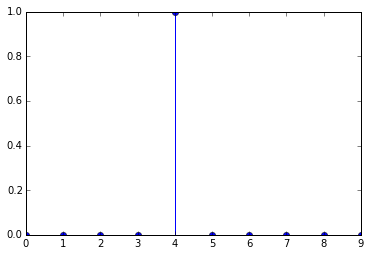

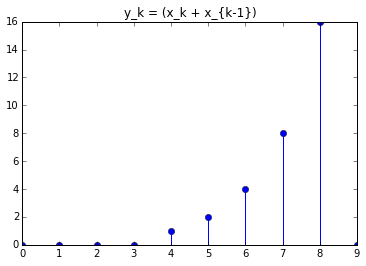

In [127]:
delta=np.zeros((N,))
k=4
N=10
delta[4]=1
plt.figure
plt.stem(delta)
plt.show()

#now we use it;;;;pay attention to the way we define the array and how it is filled, as it is done separately
#s = step(4)
y=np.zeros((N,))
for i in range (0,N-1):
    y[i]=(delta[i]+2*y[i-1])

plt.figure
plt.stem(y)
plt.title('y_k = (x_k + 2y_{k-1})')
plt.show()

#DISCUSS: Now, if we input a delta function, the response is UNSTABLE, as it is an increasing exponential (unbounded)
#It is also causal

**2.4** Test the stability of the system defined by the equation: $y_k=x_k+y_{k-1}/3$. 

Plot the impulse response.

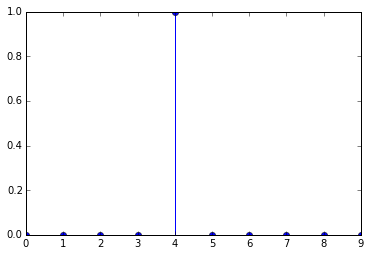

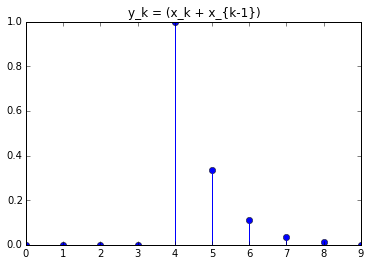

In [129]:
delta=np.zeros((N,))
k=4
N=10
delta[4]=1
plt.figure
plt.stem(delta)
plt.show()

#now we use it;;;;pay attention to the way we define the array and how it is filled, as it is done separately
#s = step(4)
y=np.zeros((N,))
for i in range (0,N-1):
    y[i]=(delta[i]+y[i-1]/3)

plt.figure
plt.stem(y)
plt.title('y_k = (x_k + x_{k-1})')
plt.show()

#DISCUSS: Now it is stable! We see in the response that is is a decreasing exponential, so it is bounded.
#It is also causal

Comments your observations

## Excercise 3 - Invariance and linearity
 

**3.1** Define the following signals: ${\tt x_a=[0\, 0\,  0 \, 0 \, 1 \, 2 \, 3 \, 4 \, 5 \, 0 \, 0 \, 0 \, 0\,  0\,  0\,  0\,  0\,  0\,  0]; x_b=[0\,  0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 4 \, 3 \, 2 \, 1 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0];}$. Compute the responses $y_a$, $y_b$ according to the equation $y=3x_{k-1}-2x_k+x_{k+1}$

plot your responses with their corresponding input.


**3.2** Prove the system defined by the previous equation is linear (and invariant). Write the equation as a convolution equation.


**3.3** Propose a nonlinear/noninvariant system.